> 텐서 : 데이터를 표현하는 단위

In [1]:
import torch

# scalar 표현

scalar1=torch.tensor([1.])
print(scalar1)

scalar2=torch.tensor([3.])
print(scalar2)

tensor([1.])
tensor([3.])


In [2]:
# 사칙연산

add_scalar=scalar1+scalar2
print(add_scalar)

sub_scalar=scalar1-scalar2
print(sub_scalar)

mul_scalar=scalar1*scalar2
print(mul_scalar)

div_scalar=scalar1/scalar2
print(div_scalar)

tensor([4.])
tensor([-2.])
tensor([3.])
tensor([0.3333])


In [3]:
# torch 모듈에 내장된 메서드 이용 가능

torch.add(scalar1, scalar2)
torch.sub(scalar1, scalar2)
torch.mul(scalar1, scalar2)
torch.div(scalar1, scalar2)

tensor([0.3333])

In [4]:
# 벡터 표현

vector1=torch.tensor([1.,2.,3.])
print(vector1)

vector2=torch.tensor([4.,5.,6.])
print(vector2)

tensor([1., 2., 3.])
tensor([4., 5., 6.])


In [5]:
# 사칙연산

add_vector=vector1+vector2
print(add_vector)

sub_vector=vector1-vector2
print(sub_vector)

mul_vector=vector1*vector2
print(mul_vector)

div_vector=vector1/vector2
print(div_vector)

tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([ 4., 10., 18.])
tensor([0.2500, 0.4000, 0.5000])


In [8]:
# torch 모듈에 내장된 메서드 이용 가능

torch.add(vector1, vector2)
torch.sub(vector1, vector2)
torch.mul(vector1, vector2)
torch.div(vector1, vector2)
torch.dot(vector1, vector2)

tensor(32.)

In [9]:
# 행렬

matrix1=torch.tensor([[1.,2.], [3.,4.]])
print(matrix1)

matrix2=torch.tensor([[5.,6.], [7.,8.]])
print(matrix2)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [10]:
# 사칙연산

sum_matrix=matrix1+matrix2
print(sum_matrix)

sub_matrix=matrix1-matrix2
print(sub_matrix)

mul_matrix=matrix1*matrix2
print(mul_matrix)

div_matrix=matrix1/matrix2
print(div_matrix)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


In [11]:
# torch 모듈에 내장된 메서드 이용 가능

torch.add(matrix1, matrix2)
torch.sub(matrix1, matrix2)
torch.mul(matrix1, matrix2)
torch.div(matrix1, matrix2)
torch.matmul(matrix1, matrix2)

tensor([[19., 22.],
        [43., 50.]])

In [12]:
# 텐서

tensor1=torch.tensor([[[1.,2.], [3.,4.]], [[5.,6.], [7.,8.]]])
print(tensor1)

tensor2=torch.tensor([[[9.,10.], [11.,12.]], [[13.,14.], [15.,16.]]])
print(tensor2)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
tensor([[[ 9., 10.],
         [11., 12.]],

        [[13., 14.],
         [15., 16.]]])


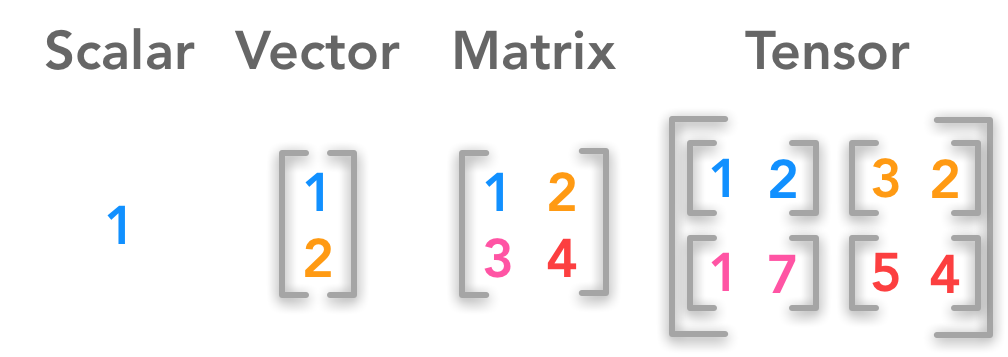

In [13]:
# 사칙연산

sum_tensor=tensor1+tensor2
print(sum_tensor)

sub_tensor=tensor1-tensor2
print(sub_tensor)

mul_tensor=tensor1*tensor2
print(mul_tensor)

div_tensor=tensor1/tensor2
print(div_tensor)

tensor([[[10., 12.],
         [14., 16.]],

        [[18., 20.],
         [22., 24.]]])
tensor([[[-8., -8.],
         [-8., -8.]],

        [[-8., -8.],
         [-8., -8.]]])
tensor([[[  9.,  20.],
         [ 33.,  48.]],

        [[ 65.,  84.],
         [105., 128.]]])
tensor([[[0.1111, 0.2000],
         [0.2727, 0.3333]],

        [[0.3846, 0.4286],
         [0.4667, 0.5000]]])


In [14]:
# torch 모듈에 내장된 메서드 이용 가능

torch.add(tensor1, tensor2)
torch.sub(tensor1, tensor2)
torch.mul(tensor1, tensor2)
torch.div(tensor1, tensor2)
torch.matmul(tensor1, tensor2)

tensor([[[ 31.,  34.],
         [ 71.,  78.]],

        [[155., 166.],
         [211., 226.]]])

> Autograd 방법 : Back Propagation을 이용해 파라미터를 업데이터하는 방법

In [15]:
BATCH_SIZE=64 # 딥러닝 모델에서 파라미터를 업데이터할 때 계산되는 데이터의 개수
INPUT_SIZE=1000 # input의 크기이자 입력층의 노드의 수 -> 1000 크기의 벡터 값을 64개 이용한다. (64,1000)
HIDDEN_SIZE=100 # 입력층에서 은닉층으로 전달됐을 때 은닉층의 노드 수 -> (64,1000) (1000,100)
OUTPUT_SIZE=10 # 최종으로 비교하고자 하는 레이블의 크기와 동일하게 설정

In [17]:
if torch.cuda.is_available():
  DEVICE=torch.device('cuda')
else:
  DEVICE=torch.device('cpu')

In [18]:
x=torch.randn(BATCH_SIZE, INPUT_SIZE, 
              device=DEVICE, # 미리 설정한 DEVICE를 이용하여 계산
              dtype=torch.float, 
              requires_grad=False) # 해당 데이터는 input으로 이용되기 때문에 gradient를 계산할 필요가 없음. 파라미터 값을 업데이트하기 위해 gradient를 계산하는 것이지, input에 대해 X
y=torch.randn(BATCH_SIZE, OUTPUT_SIZE, 
              device=DEVICE, 
              dtype=torch.float, 
              requires_grad=False) 
w1=torch.randn(INPUT_SIZE, HIDDEN_SIZE, # (1000,100)개의 데이터 생성
              device=DEVICE, 
              dtype=torch.float, 
              requires_grad=False) 
w2=torch.randn(HIDDEN_SIZE, OUTPUT_SIZE, # dot(w1, x)에 계산할 수 있는 데이터여야 함. 
              device=DEVICE, 
              dtype=torch.float, 
              requires_grad=False) 

In [19]:
learning_rate=1e-6
for t in range(1,501):
  y_pred=x.mm(w1).clamp(min=0).mm(w2) # dot(x,w1) 값을 clamp 매서드를 이용해 비선형 함수를 적용 (ReLU와 같은 역할) & w2를 이용해 행렬 곱을 한 번 더 계산

  loss=(y_pred-y).pow(2).sum() # mse 계산
  if t%100==0:
    print("Iteration : ", t, "\t", "Loss : ", loss.item()) # 모니터링
  loss.backward() # 각 파라미터 값에 대해 gradient 값을 계산하고 이를 통해 back propagation을 진행

  with torch.no_grad(): # 파라미터 값을 업데이트할 때는 해당 시점의 gradient 값을 고정한 후 업데이트를 진행
    # 음수를 사용하는 이유 : loss 값이 최소로 계산될 수 있는 파라미터 값을 찾기 위해 gradient 값에 대한 반대 방향으로 계산
    w1-=learning_rate*w1.grad # w1.grad : w1의 gradient
    w2-=learning_rate*w2.grad

    # 각 파라미터 값의 gradient를 초기화해 다음 반복문을 진행할 수 있도록 설정
    w1.grad.zero_()
    w2.grad.zero_()

RuntimeError: ignored